# Brent Oil Future Data Preprocessing

This notebook demonstrates preprocessing steps for the Brent Oil Future daily data.

### 1. Load the dataset

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../Brent Oil Futures - Nov 24 (LCOX4)/Brent Oil Future Daily.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,20-09-2024,74.72,74.78,75.00,74.00,NaN,-0.21%
1,19-09-2024,74.88,73.13,75.18,72.91,299.01K,1.67%
2,18-09-2024,73.65,73.69,74.10,72.31,290.81K,-0.07%
3,17-09-2024,73.70,72.91,74.28,72.17,274.59K,1.31%
4,16-09-2024,72.75,72.09,73.39,71.52,232.18K,1.59%


### 2. Preprocessing Steps

We will perform the following preprocessing steps:
1. Convert 'Date' to datetime format
2. Clean the 'Vol.' column (remove 'K' and convert to numeric)
3. Clean the 'Change %' column (remove '%' and convert to numeric)
4. Handle missing values in 'Vol.' by dropping rows

In [2]:
# Preprocessing function for the dataset
def preprocess_oil_data(data):
    # 1. Convert 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
    
    # 2. Clean 'Vol.' column (convert K to thousands and handle NaN values)
    data['Vol.'] = data['Vol.'].replace('K', '', regex=True)  # Remove 'K' suffix
    data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')  # Convert to numeric, set invalid parsing as NaN
    
    # 3. Clean 'Change %' column (remove '%' and convert to float)
    data['Change %'] = data['Change %'].str.replace('%', '', regex=False)
    data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')
    
    # 4. Handle missing values by dropping rows with NaNs in 'Vol.'
    data.dropna(subset=['Vol.'], inplace=True)
    
    return data

# Apply preprocessing to the dataset
preprocessed_data = preprocess_oil_data(data)
preprocessed_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
1,2024-09-19,74.88,73.13,75.18,72.91,299.01,1.67
2,2024-09-18,73.65,73.69,74.10,72.31,290.81,-0.07
3,2024-09-17,73.70,72.91,74.28,72.17,274.59,1.31
4,2024-09-16,72.75,72.09,73.39,71.52,232.18,1.59
5,2024-09-13,71.61,72.30,73.24,71.46,260.64,-0.50


### 3. Preprocessed Data Summary

In [3]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1290 entries, 1 to 1291
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1290 non-null   datetime64[ns]
 1   Price     1290 non-null   float64       
 2   Open      1290 non-null   float64       
 3   High      1290 non-null   float64       
 4   Low       1290 non-null   float64       
 5   Vol.      1290 non-null   float64       
 6   Change %  1290 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.6 KB


In [4]:
# Save the preprocessed data to a new CSV file
preprocessed_data.to_csv('preprocessed_brent_oil_data.csv', index=False)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
data = pd.read_csv('preprocessed_brent_oil_data.csv')



In [6]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])




2. Time Series Data Visualization
In this section, we will create a few time series plots to understand the trends and changes in Brent Oil Futures data. Time series analysis is an essential technique for identifying patterns such as trends and seasonality in financial or trading data.







2.1. Line Plot of Prices (Price, Open, High, Low)
We will plot the closing price, opening price, highest price, and lowest price of Brent Oil Futures to observe how these values change over time. This helps us analyze key metrics and spot trends in the price movement.

Price: The final price at which the commodity was traded at the end of the day.
Open: The first price recorded for the day.
High: The highest price recorded during the day.
Low: The lowest price recorded during the day.
This plot will give us insights into daily price variations and overall trends.

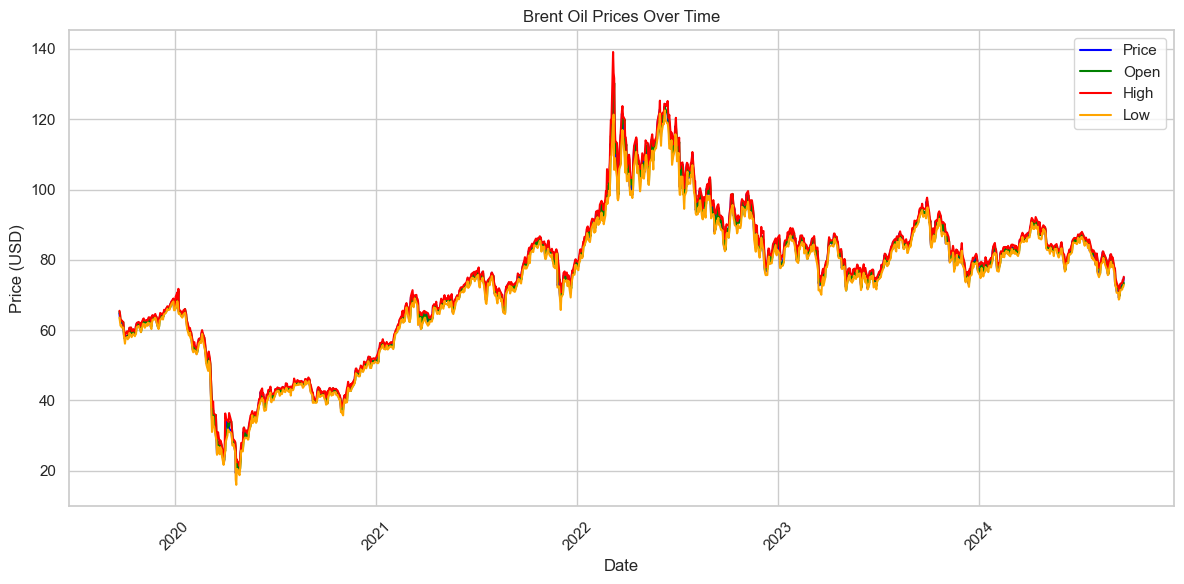

In [7]:
# Set the plot style
sns.set(style="whitegrid")

# 1. Line Plot of Prices (Price, Open, High, Low)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Price', color='blue')
plt.plot(data['Date'], data['Open'], label='Open', color='green')
plt.plot(data['Date'], data['High'], label='High', color='red')
plt.plot(data['Date'], data['Low'], label='Low', color='orange')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



2.2. Volume Over Time
Next, we will visualize the trading volume over time. The trading volume shows the amount of oil traded each day, which can help identify periods of high activity or significant market interest.

Understanding volume trends alongside price changes can help indicate market sentiment. For instance, a spike in trading volume with a price increase may indicate strong buying interest.



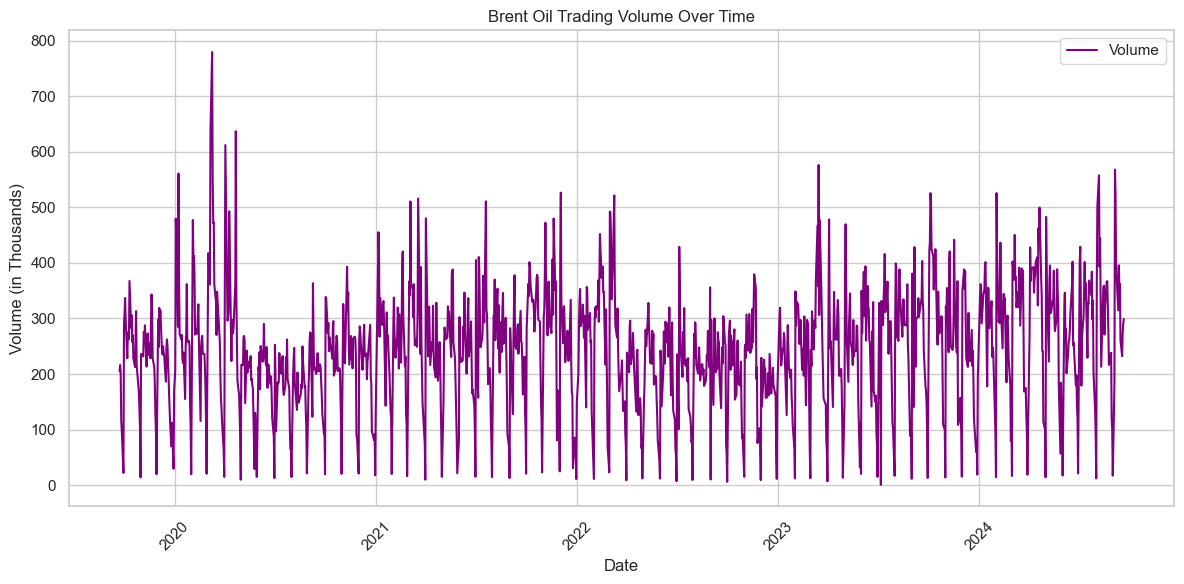

In [8]:
# 2. Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Vol.'], label='Volume', color='purple')
plt.title('Brent Oil Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (in Thousands)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



2.3. Price Change Percentage Over Time
We will also plot the percentage change in price over time. This is calculated as the day-to-day percentage change in the price of Brent Oil Futures, which helps us observe the volatility of the market.

Positive values indicate price increases, while negative values show declines.
Sudden large percentage changes might indicate significant market events or news affecting oil prices.

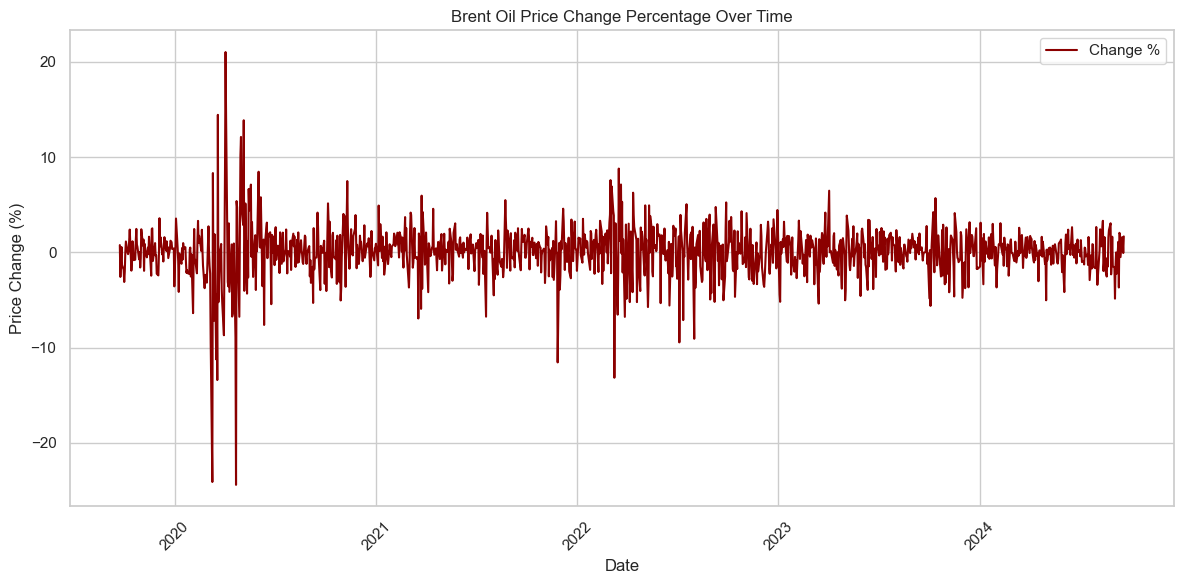

In [9]:
# 3. Price Change Percentage Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Change %'], label='Change %', color='darkred')
plt.title('Brent Oil Price Change Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()